**Проект: определение вида физической активности человека по показателям, полученных с датчиков пространственного положения**

**Подготовил: Литинский Алексей**

## <font color='green'>Review. Часть 1</font>

-       описание набора данных и признаков (на понятном русском, желательно с картинками) - 1 балл

<font color='green'>1 балл. 
</font>

-       первичный анализ признаков  - 3 балла

<font color='green'>3 балла. <br> <br> )
</font>

-       первичный визуальный анализ признаков  - 3 балла

<font color='green'3 балла. <br> 
</font>

-       если пришли к каким-то "инсайтам", обнаружили закономерности - изложите  - 3 балла

<font color='green'>3 балла <br> 
Первичный анализ проведен достаточно качественно, интересно будет посмотреть на t-test в следующей сдаче.
</font>

## <font color='green'>Итого: 10 баллов (округл.)</font>

**1\. Описание набора данных и решаемых задач**

Работа посвящена анализу следующего набора данных: https://archive.ics.uci.edu/ml/datasets/Localization+Data+for+Person+Activity

Данные были получены в результате серии замеров, проведённых в ходе следующего опыта:

Была сформирована группа из пяти человек. Каждый из этих людей пять раз подряд выполнял следующую последовательность действий:
1. Ходьба (walking)
2. Перемещение из состояния "стоя" в состояние "сидя" (sitting down)
3. Сидение на стуле (sitting)
4. Подъём из состояния "сидя" (standing up from sitting)
5. Падение (falling)
6. Пребывание в состоянии "лёжа" (lying)
7. Подъём из состояния "лёжа" (standing up from lying)
8. Перемещение в состояние "лёжа" (lying down)
9. Сидение на земле (sitting on the ground)
10. Подъём из состояния "сидя на земле" (standing up from sitting on the ground)
11. Стояние на четвереньках (on all fours)

При этом, на каждом человеке было закреплено 4 датчика пространственного положения:
1. На груди
2. На поясе
3. На левой лодыжке
4. На правой лодыжке

В ходе выполнения опыта с каждого датчика поступала информация о пространственных координатах датчика по каждому из 3-х измерений. В результате был получен набор первичных данных, в котором каждая запись соответствует показаниям одного из датчиков в определённый момент времени. Атрибуты набора:
1. **Идентификатор последовательности (Sequence Name), номинальный**: комбинация идентификатора участника и номера повтора последовательности действий. Каждому участнику был присвоен идентификатор из набора: {A, B, C, D, E}. Повторам последовательности для каждого участника присвивались индексы с 1 до 5. Всё множество идентификаторов последовательностей представляет собой: {A01, A02, A03, A04, A05, B01, B02, B03, B04, B05, C01, C02, C03, C04, C05, D01, D02, D03, D04, D05, E01, E02, E03, E04, E05}.

2. **Идентификатор датчика (Tag identificator), номинальный**: идентификатор датчика, соответствующего определённой части тела:
    - Левая лодыжка (ANKLE_LEFT): 010-000-024-033
    - Правая лодыжка (ANKLE_RIGHT): 010-000-030-096
	- Грудь (CHEST): 020-000-033-111
    - Пояс (BELT): 020-000-032-221
3. **Метка времени (timestamp), количественный**: уникальный для каждой записи целочисленный атрибут. Скорее всего, представляет метку времени, но в неизвестном формате.
4. **Дата (date), количественный**: дата и времени регистрации показания датчика с точностью до миллисекунд. Формат: dd.MM.yyyy HH:mm:ss:SSS.
5. **Координата датчика по оси x (x coordinate of the tag), количественный**: координата датчика по оси x в момент регистрации показания с
него.
6. **Координата датчика по оси y (y coordinate of the tag), количественный**: координата датчика по оси y в момент регистрации показания с него.
7. **Координата датчика по оси z (z coordinate of the tag), количественный**: координата датчика по оси z в момент регистрации показания с него.
8. **Действие (activity), номинальный**: действие, которое совершал человек в момент регистрации показания с датчика.

**Задачи исследования:**
1. Обязательно: научиться определять действие, совершённое человеком по полному набору данных с датчиков. То есть, по показаниям, снятых со всего периода выполнения действия.
2. Опционально: научиться определять действие, совершённое человеком по неполному набору данных с датчиков. То есть, по показаниям, снятых с непрерывной части периода выполнения действия.

**2. Анализ и обработка первичных данных**

In [21]:
# Python 2 and 3 compatibility
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts

Populating the interactive namespace from numpy and matplotlib


In [22]:
df_data = pd.read_csv('ConfLongDemo_JSI.txt')

In [24]:
print(df_data.shape)
print(df_data.columns)

(164859, 8)
Index(['A01', '010-000-024-033', '633790226051280329',
       '27.05.2009 14:03:25:127', '4.062931060791016', '1.8924342393875122',
       '0.5074254274368286', 'walking'],
      dtype='object')


Присвоение имени каждому из Series первичного набора данных. Поскольку формат поля timestamp восстановить не удаётся, соответсвующий ему Series будет использоваться как уникальный идентификатор записи и получит название "id".

In [25]:
df_data.columns = ['seqName', 'tagId', 'id', 'date', 'xCoord', 'yCoord', 'zCoord', 'activity']
print(df_data.columns)

Index(['seqName', 'tagId', 'id', 'date', 'xCoord', 'yCoord', 'zCoord',
       'activity'],
      dtype='object')


Первичная подготовка данных к анализу:
1. Создание признака **tagName** с удобочитаемым идентификатором типа датчика:
    - ANL - Левая лодыжка (ANKLE_LEFT): 010-000-024-033
    - ANR - Правая лодыжка (ANKLE_RIGHT): 010-000-030-096
    - CST - Грудь (CHEST): 020-000-033-111
    - BLT - Пояс (BELT): 020-000-032-221
2. Создание признака **person** с идентификатором человека
3. Создание признака **sequence** с номером последовательности действий, выполняемой человеком
4. Создание признака **timestamp** с меткой времени в int формате, единицы измерения - милисекунды

Так же для дальнейшего использования будут созданы следующие справичники (фактически - списки python):
1. **list_tagNames** - со значениями признака tagName
2. **list_activities** - со значениями признака activity
3. **list_seqNames** - со значениями признака seqName
4. **list_persons** - со значениями признака person

In [26]:
list_tagIds = ['010-000-024-033', '020-000-033-111', '020-000-032-221', '010-000-030-096']
list_tagNames = ['ANL', 'CST', 'BLT', 'ANR']

sr_tags = pd.Series(list_tagNames, index = list_tagIds)

df_data['tagName'] = df_data['tagId'].apply(lambda tag_id: sr_tags.ix[tag_id])
#df_data['person'] = df_data['seqName'].apply(lambda seq_name: seq_name[0:1])
#df_data['sequence'] = df_data['seqName'].apply(lambda seq_name: int(seq_name[1:3]))
df_data['timestamp'] = df_data['date']\
.apply(lambda date_time: pd.to_numeric(pd.to_datetime([date_time], format = '%d.%m.%Y %H:%M:%S:%f'))[0] // 1000000)

In [27]:
list_activities = df_data['activity'].unique()

list_seqNames = df_data['seqName'].unique()
list_seqNames.sort()

#list_persons = df_data['person'].unique()
#list_persons.sort()

#print("Список людей: {}".format(list_persons))
print("Список последовательностей: {}".format(list_seqNames))
print("Список выполняемых действий: {}".format(list_activities))
print("Список датчиков: {}".format(list_tagNames))

Список последовательностей: ['A01' 'A02' 'A03' 'A04' 'A05' 'B01' 'B02' 'B03' 'B04' 'B05' 'C01' 'C02'
 'C03' 'C04' 'C05' 'D01' 'D02' 'D03' 'D04' 'D05' 'E01' 'E02' 'E03' 'E04'
 'E05']
Список выполняемых действий: ['walking' 'sitting down' 'sitting' 'standing up from sitting' 'falling'
 'lying' 'standing up from lying' 'lying down' 'sitting on the ground'
 'standing up from sitting on the ground' 'on all fours']
Список датчиков: ['ANL', 'CST', 'BLT', 'ANR']


DataFrame с исходными данными примет вид:

In [28]:
df_data.head().T

,0,1,2,3,4
seqName,A01,A01,A01,A01,A01
tagId,020-000-033-111,020-000-032-221,010-000-024-033,010-000-030-096,020-000-033-111
id,633790226051820913,633790226052091205,633790226052361498,633790226052631792,633790226052902087
date,27.05.2009 14:03:25:183,27.05.2009 14:03:25:210,27.05.2009 14:03:25:237,27.05.2009 14:03:25:263,27.05.2009 14:03:25:290
xCoord,4.29195,4.3591,4.08784,4.32446,4.36408
yCoord,1.78114,1.82646,1.88,2.07246,1.76769
zCoord,1.3445,0.968821,0.466983,0.488065,1.3
activity,walking,walking,walking,walking,walking
tagName,CST,BLT,ANL,ANR,CST
timestamp,1243433005183,1243433005210,1243433005237,1243433005263,1243433005290


Важно понимать, что единицей анализа для нас является факт однократного выполнения человеком какого-либо действия (ходьба, сидение, падение, дальше - просто "действие"). Информация по каждому действию в текущем наборе данных распределена по большому количеству записей. Необходимо определить набор атрибутов, который может быть присущ каждому действию и создать новый набор данных, в котором значения этих атрибутов будут содержаться в явном виде.

Для действия можно выделить две группы атрибутов:
1. Метаданные
2. Непосредственно показатели, считанные с датчиков

Под метаданным понимаются показатели времени и количественные показатели, связанные с измерениями. Из текущего набора данных для каждого действия мы можем извлечь следующие метаданные:
1. Метка времени начала выполнения действия (**tsStart**)
2. Метка времени окончания выполнения действия (**tsEnd**)
3. Общее выполнения действия (**length**)
4. Количество показаний, полученных с датчика ANL в ходе выполнения действия (**ANLsgnls**)
5. Количество показаний, полученных с датчика CST в ходе выполнения действия (**CSTsgnls**)
6. Количество показаний, полученных с датчика BLT в ходе выполнения действия (**BLTsgnls**)
7. Количество показаний, полученных с датчика ANR в ходе выполнения действия (**ANRsgnls**)

Для удобства дальнейшей обработки, показатели, связанные со временем (tsStart, tsEnd, length) будут храниться в int формате.

Что касается непосредственно показателей, считанных с датчиков, то структуру их храненения имеет смысл рассмотреть позже, после первичного анализа мета-атрибутов.

Сохраним новый набор данных для хранения значений атрибутов действий и вычислим значения перечисленных мета-атрибутов:

In [29]:
df_activity = df_data[['seqName', 'activity']].drop_duplicates(subset = ['seqName', 'activity'])
df_activity.index = range(df_activity.shape[0])

In [30]:
gr_data_seq = df_data.groupby(by = ['seqName', 'activity'])
gr_data_tag = df_data.groupby(by = ['seqName', 'activity', 'tagName'])


df_activity['tsStart'] = pd.Series(index = df_activity.index)
df_activity['tsEnd'] = pd.Series(index = df_activity.index)
df_activity['length'] = pd.Series(index = df_activity.index)
df_activity['ANLsgnls'] = pd.Series(index = df_activity.index)
df_activity['CSTsgnls'] = pd.Series(index = df_activity.index)
df_activity['BLTsgnls'] = pd.Series(index = df_activity.index)
df_activity['ANRsgnls'] = pd.Series(index = df_activity.index)

for i in range(df_activity.shape[0]):
    df_activity.at[i, 'tsStart'] = \
    gr_data_seq.get_group((df_activity.loc[i]['seqName'], \
                           df_activity.loc[i]['activity']))['timestamp'].min()
    df_activity.at[i, 'tsEnd'] = \
    gr_data_seq.get_group((df_activity.loc[i]['seqName'], \
                           df_activity.loc[i]['activity']))['timestamp'].max()
    df_activity.at[i, 'length'] = df_activity.at[i, 'tsEnd'] - df_activity.at[i, 'tsStart']
    for str_tag in list_tagNames:
        df_activity.at[i, str_tag + 'sgnls'] = \
        gr_data_tag.get_group((df_activity.loc[i]['seqName'], \
                               df_activity.loc[i]['activity'], \
                               str_tag))['id'].count()

Полученный набор данных примет вид:

In [31]:
df_activity.head(2)

,seqName,activity,tsStart,tsEnd,length,ANLsgnls,CSTsgnls,BLTsgnls,ANRsgnls
0,A01,walking,1.243433e+12,1.243433e+12,191854.0,247.0,244.0,253.0,132.0
1,A01,sitting down,1.243433e+12,1.243433e+12,97114.0,21.0,22.0,20.0,11.0


In [32]:
df_activity.shape

(273, 9)

**3. Первичный анализ мета-атрибутов действий**

На данный момент нас нтересуют следующие признаки:
1. Общее время выполнения действия (**length**)
2. Количество показаний, полученных с датчика ANL в ходе выполнения действия (**ANLsgnls**)
3. Количество показаний, полученных с датчика CST в ходе выполнения действия (**CSTsgnls**)
4. Количество показаний, полученных с датчика BLT в ходе выполнения действия (**BLTsgnls**)
5. Количество показаний, полученных с датчика ANR в ходе выполнения действия (**ANRsgnls**)

Рассмотрим значения основных статистик по данным признакам:

In [33]:
df_activity.describe()

,tsStart,tsEnd,length,ANLsgnls,CSTsgnls,BLTsgnls,ANRsgnls
count,2.730000e+02,2.730000e+02,273.000000,273.000000,273.000000,273.000000,273.000000
mean,1.243431e+12,1.243431e+12,99921.952381,159.432234,131.139194,157.410256,155.897436
std,5.347871e+06,5.335049e+06,78594.739795,183.934681,152.502226,180.768072,179.634444
min,1.243422e+12,1.243422e+12,623.000000,2.000000,3.000000,5.000000,3.000000
25%,1.243426e+12,1.243426e+12,7890.000000,27.000000,23.000000,26.000000,26.000000
50%,1.243431e+12,1.243431e+12,111840.000000,70.000000,63.000000,65.000000,72.000000
75%,1.243434e+12,1.243434e+12,157837.000000,254.000000,195.000000,247.000000,240.000000
max,1.243440e+12,1.243440e+12,304863.000000,817.000000,787.000000,825.000000,817.000000


Полученные результаты оказались не слишком информативны и позволяют сделать только самые общие предположения:
1. Рассматриваемые признаки обладают достаточной вариативностью для того, чтобы продолжение поиска их зависимости от целевого признака имело смысл.
2. Статистики количества показателей с датчиков (ANLsgnls, CSTsgnls, BLTsgnls, ANRsgnls) позволяют сделать предположение о том, что показания со всех четырёх датчиков снималимались синхронно и между этими признаками возможна сильная положительная зависимость.

Поскольку данная работа посвящена решению задач категоризации, логично рассмотреть распределение каждого из данных признаков в разрезе по значениям целевого признака (activity). Сделаем это с помощью диаграмм BoxPlot:

(0.0, 325000)

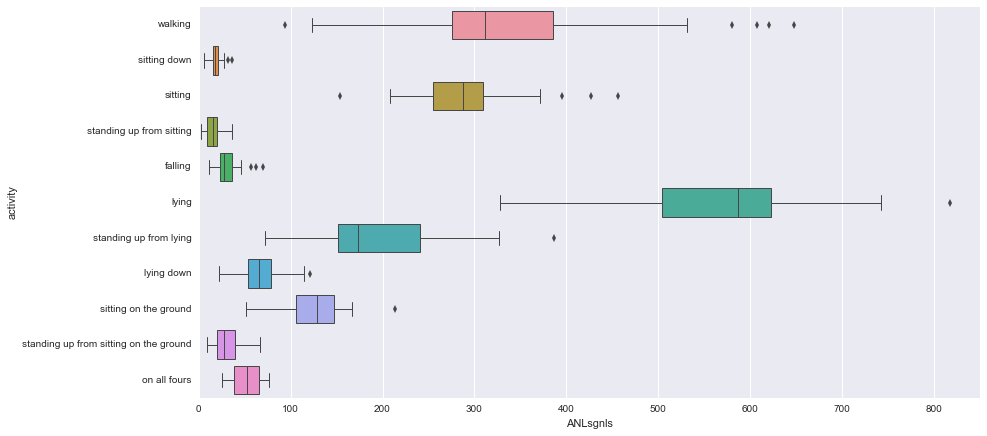

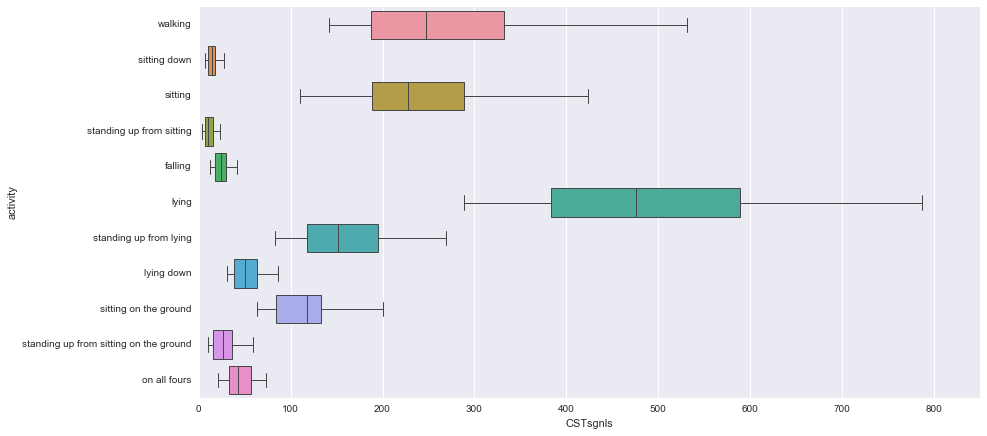

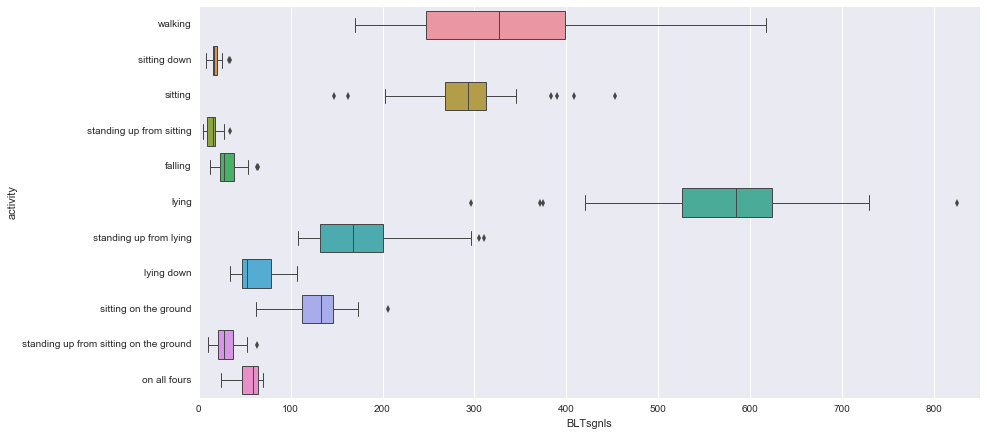

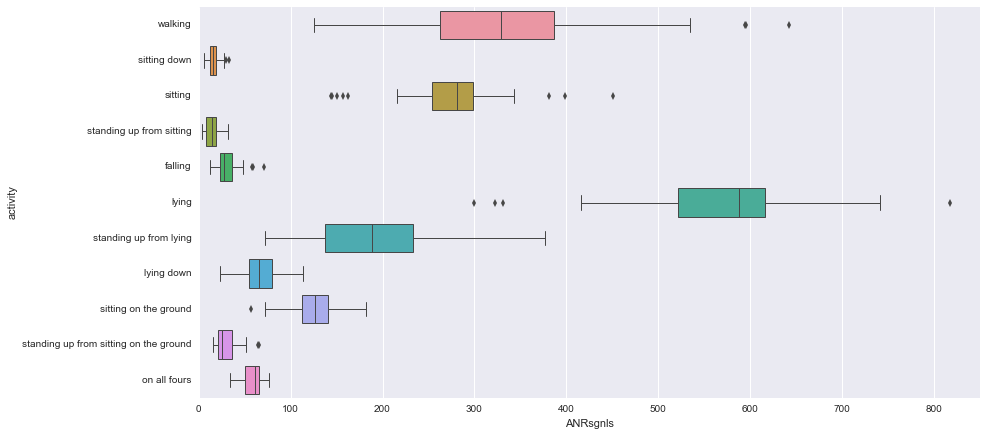

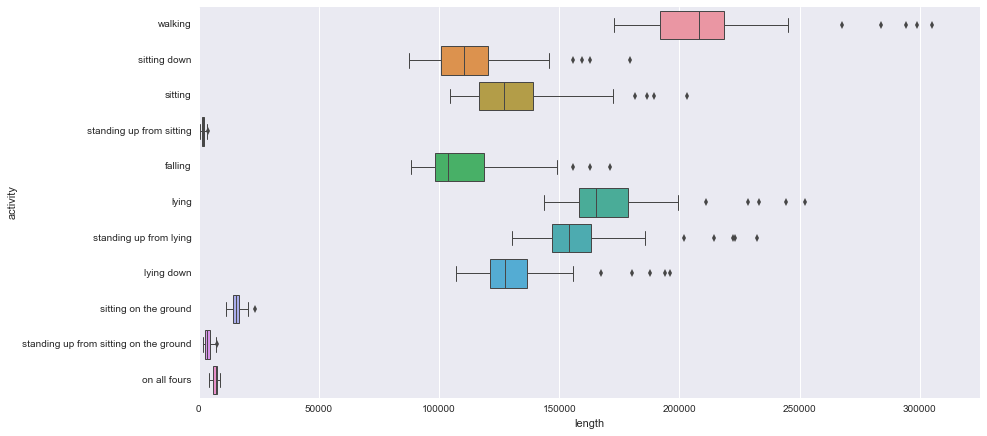

In [34]:
sns.set_context(rc = {'lines.linewidth': 1})

ANL_ax = plt.subplots(figsize = (14, 7))
ANL_ax = sns.boxplot(data = df_activity, x = 'ANLsgnls', y = 'activity')
ANL_ax.set_xlim(left=None, right=850, emit=True, auto=False)

CST_ax = plt.subplots(figsize = (14, 7))
CST_ax = sns.boxplot(data = df_activity, x = 'CSTsgnls', y = 'activity')
CST_ax.set_xlim(left=None, right=850, emit=True, auto=False)

BLT_ax = plt.subplots(figsize = (14, 7))
BLT_ax = sns.boxplot(data = df_activity, x = 'BLTsgnls', y = 'activity')
BLT_ax.set_xlim(left=None, right=850, emit=True, auto=False)

ANR_ax = plt.subplots(figsize = (14, 7))
ANR_ax = sns.boxplot(data = df_activity, x = 'ANRsgnls', y = 'activity')
ANR_ax.set_xlim(left=None, right=850, emit=True, auto=False)

lng_ax = plt.subplots(figsize = (14, 7))
lng_ax = sns.boxplot(data = df_activity, x = 'length', y = 'activity')
lng_ax.set_xlim(left=None, right=325000, emit=True, auto=False)

Диаграммы Box-plot позволяют сделать два важных вывода:
1. Очевидно, что есть зависимость между целевым признаком и всеми пятью мета-признаками
2. Очевидно, что между признаками ANLsgnls, CSTsgnls, BLTsgnls, ANRsgnls существует сильная положительная зависимость

Несмотря на то, что первый вывод интереснее с точки зрения задач исследования, сначала обратимся к выводу 2. Проверим зависимость между признаками ANLsgnls, CSTsgnls, BLTsgnls, ANRsgnls графически:

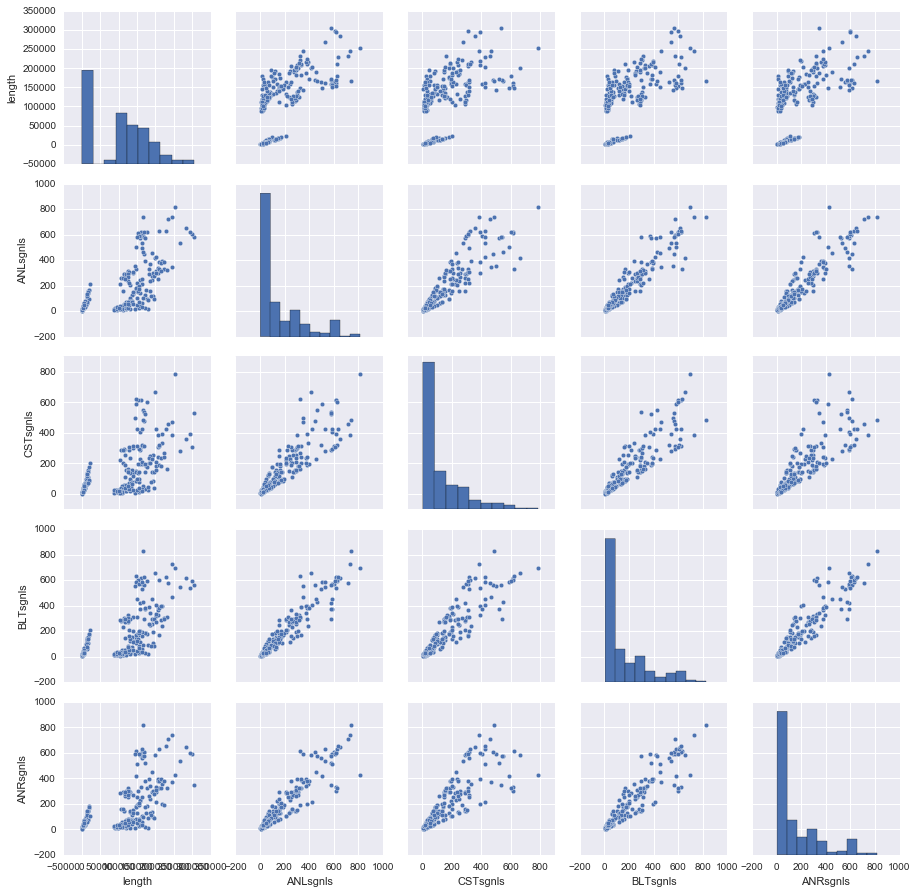

In [35]:
sns.pairplot(df_activity[['length', 'ANLsgnls', 'CSTsgnls', 'BLTsgnls', 'ANRsgnls']])

Графически сильная положительная зависимость между признаками ANLsgnls, CSTsgnls, BLTsgnls, ANRsgnls подтверждается.

И расчитаем для данных признаков попарно коэффициенты корреляции (Пирсона):

In [36]:
df_activity.corr(method='pearson')

,tsStart,tsEnd,length,ANLsgnls,CSTsgnls,BLTsgnls,ANRsgnls
tsStart,1.000000,0.999895,-0.170290,-0.151125,-0.010778,-0.166077,-0.104824
tsEnd,0.999895,1.000000,-0.155967,-0.141675,-0.001883,-0.156866,-0.095634
length,-0.170290,-0.155967,1.000000,0.666176,0.605593,0.652357,0.640929
ANLsgnls,-0.151125,-0.141675,0.666176,1.000000,0.898678,0.956111,0.936479
CSTsgnls,-0.010778,-0.001883,0.605593,0.898678,1.000000,0.907871,0.849020
BLTsgnls,-0.166077,-0.156866,0.652357,0.956111,0.907871,1.000000,0.938386
ANRsgnls,-0.104824,-0.095634,0.640929,0.936479,0.849020,0.938386,1.000000


Нас интересуют коэффициенты корреляции между признаками ANLsgnls, CSTsgnls, BLTsgnls, ANRsgnls. Значения данных коэффициентов подтверждают сильную положительную зависимость между ними. Скорее всего эта зависимость является следствием того, что показания с датчиков снимаются действительно синхронно.

Этот факт позволяет сделать следующее допущение: можно проводить анализ не значений каждого отдельного признака ANLsgnls, CSTsgnls, BLTsgnls, ANRsgnl, а их усреднённого значения для каждого действия. Возможно, это сократит точность прогнозирования, но на данном этапе существенно уменьшит трудоёмкость. Кроме того, в случае неудовлетворительной точности можно будет вернуться к анализу каждого из четырёх признаков по отдельности.

Создадим агрегированный признак **sgnls_avg - усреднённое количество показаний со всех датчиков, полученное в ходе каждого действия** путём простого усреднения значений признаков ANLsgnls, CSTsgnls, BLTsgnls, ANRsgnls для каждого наблюдаемого действия:

In [37]:
df_activity['sgnls_avg'] = (df_activity['ANLsgnls'] + \
                            df_activity['CSTsgnls'] + \
                            df_activity['BLTsgnls'] + \
                            df_activity['ANRsgnls']) / 4

В целом, распределение признака sgnls_avg в разрезе значений целевого признака activity повторяет распределение каждого из исходных признаков по отдельности:

(0.0, 750)

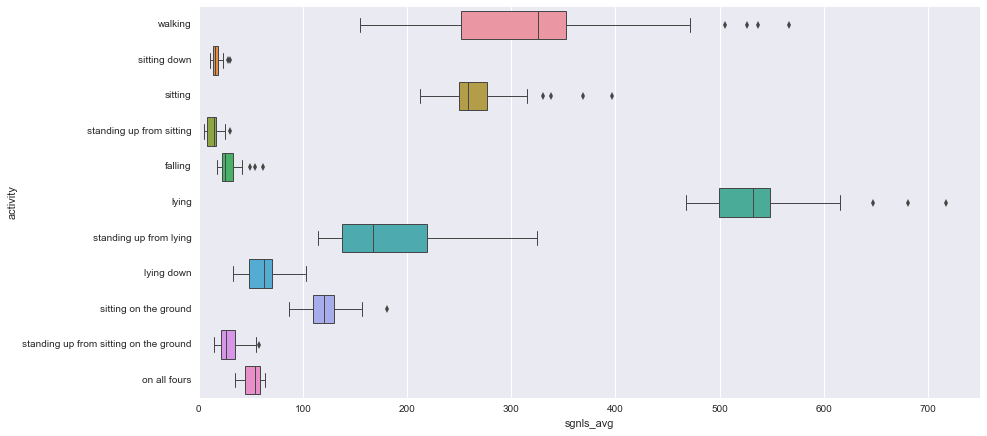

In [38]:
avg_ax = plt.subplots(figsize = (14, 7))
avg_ax = sns.boxplot(data = df_activity, x = 'sgnls_avg', y = 'activity')
avg_ax.set_xlim(left=None, right=750, emit=True, auto=False)

Итого мы имеем два мета-признака: время выполнения действия и усреднённое количество показаний с датчиков (length, sgnls_avg), каждый из которых влияет на целевой признак activity. Рассмотрим, как их комбинация может влиять на целевой признак. Для этого построим ScatterPlot с выделением различных целевых классов:

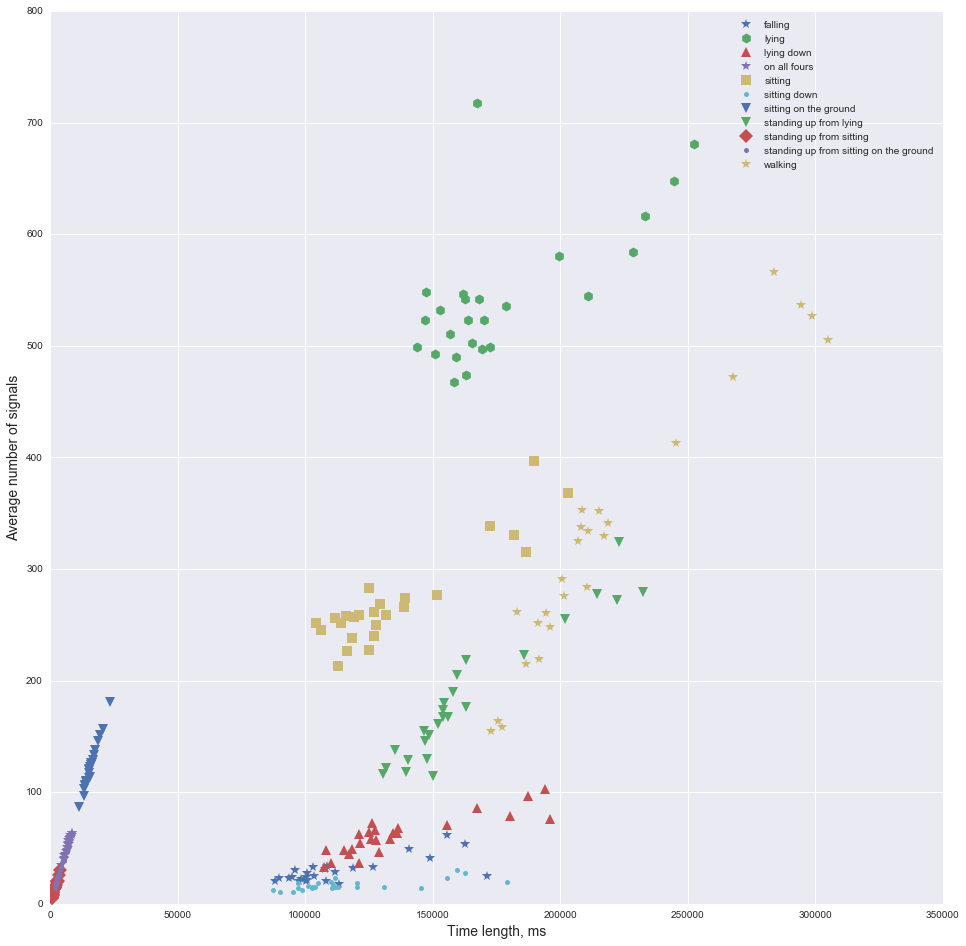

In [46]:
gr_activ = df_activity.groupby('activity')
markers = ['*', 'h', '^', '*', 's', '.', 'v', 'v', 'D', '.', '*']

plt_fig, plt_ax = plt.subplots(figsize = (16, 16))
for (name, group), mark in zip(gr_activ, markers):
    plt_ax.plot(group['length'], group['sgnls_avg'], marker = mark, linestyle = '', ms = 10, label = name)
plt_ax.legend()
plt.xlabel('Time length, ms', fontsize = 14)
plt.ylabel('Average number of signals', fontsize = 14)
plt.show()

Полученный результат позволяет нам по значению мета-признаков (length, sgnls_avg) однозначно обособить следующие отдельные целевые классы:
1. Lying
2. Sitting on the ground

А так же группы целевых классов:
1. Standing up from sitting, Standing up from sitting on the ground, Sitting on the ground
2. Sitting, Walking, Standing up from lying
3. Lying down, On all fours, Sitting down

Это может использоваться, например, для реализации первичной классификации каждого наблюдения с помощью бинарного дерева.

**4. Первичный анализ показателей датчиков**

Очевидно, что наибольший объём информации, необходимой для категоризации наблюдения, содержиться в показателях, считанных с датчиков. В первую очередь возникает задача представления этих показателей в виде атрибутов набора данных df_activity.

Показания датчиков для каждого наблюдения можно представить в виде вектора, каждая компонента которого будет представлять показание датчика и являться атрибутом анализируемого набора данных. В этом решении сразу же возникает проблема размерности векторов.

Результаты анализа мета-атрибутов показывают, что при каждом наблюдении количество показаний датчиков могут отличаться даже для одинаковых действий. То есть, возникает задача приведения всех векторов с показаниями датчиков к одной и той же размерности.

Результат анализа мета-атрибутов показывает, что количество показаний разных датчиков, полученных в ходе одного наблюдения, очень сильно коррелирует между собой. Это позволяет предположить, что показания с разных датчиков снимаются более или менее синхронно, фактически представляя набор "снимков" или "кадров" положения человека в пространстве в определённый момент времени. В совокупности этот набор кадров и будет составлять образ действия, подлежащий классификации.

То есть, в рамках одного наблюдения возникает задача объединения показаний всех датчиков в набор кадров (фактически, приведение векторов с показаниями каждого отдельного датчика к одинаковой размерности).

В рамках всех наблюдений возникает задача приведения к одинаковой размерности всех образов действий, полученных в результате наблюдений.

*Коллеги, я понимаю, что я безбожно нарушаю дедлайн, поэтому высылаю первую часть проекта в том виде, в котором она есть сейчас. Моей главной ошибкй было то, что я слишком долго варился в собственном соку, закопался и необратился к вам за помощью раньше. В п.4 я в самом общем виде описал направление, в котором я работаю в настоящий момент. В случае, если это направление тупиковое, просьба сообщить мне. Я нашёл несложный запасной вариант (http://archive.ics.uci.edu/ml/datasets/Wine+Quality), который я смогу раскрутить за пару дней, со всеми возможными штрафными баллами, конечно же. Но хотелось бы попробовать добить этот.*

*Так же у меня возник вопрос про статистические гипотезы, дублирую его сюда из Пьяццы:*

*Тогда такой вопрос относительно t-теста: в случае, если количество значений целевого признака не 2, а 11 (11 конечных вариантов классификации), то он проводится попарно для всех пар выборок, соответствующих значениям целевого признака или же для пар выборок "целевое значение - все остальные значения". Имеет ли вообще смысл проводить t-тест в таком случае? Аналогично, вообщем-то, про z-тест и критерий Маунта-Уитни*

*Ещё общие вопросы на понимание статистик:*

*z-тест в данном случае неприменим в связи с тем, что мы не знаем дисперсию генеральной совокупности и у нас не очень большой объём выборки (273)?*